Fitness of best solution in generation  0  is  281928.99957487144
Fitness of best solution in generation  10  is  24662.10014285622
Fitness of best solution in generation  20  is  12679.282672761865
Fitness of best solution in generation  30  is  9407.79281239291
Fitness of best solution in generation  40  is  6985.947856107631
Fitness of best solution in generation  50  is  6842.980845006793
Fitness of best solution in generation  60  is  6717.917751433335
Fitness of best solution in generation  70  is  6564.140618440092
Fitness of best solution in generation  80  is  6338.969576638534
Fitness of best solution in generation  90  is  6264.969870106017
Fitness of best solution in generation  100  is  6253.065638647561
Fitness of best solution in generation  110  is  6250.50325313957
Fitness of best solution in generation  120  is  6250.50325313957
Fitness of best solution in generation  130  is  6250.50325313957
Fitness of best solution in generation  140  is  6250.50325313957
Best solu

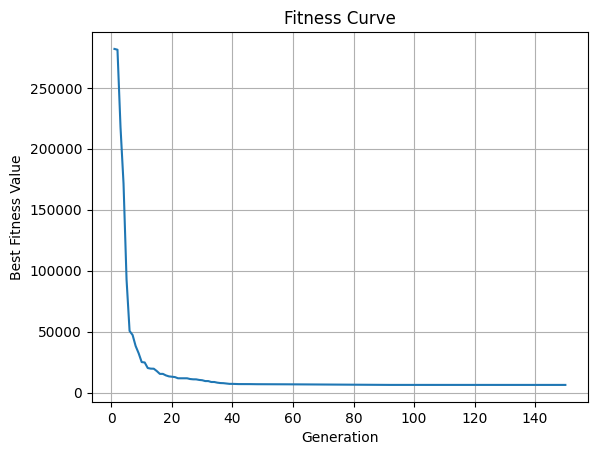

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables in the optimization problem
numberOfVariables = 4

# Define the minimum and maximum values for each variable
varmin = np.array([0, 0, 10, 10])
varmax = np.array([100, 100, 200, 200])

# Define the number of individuals in the population
numberOfPopulation = 100

# Define the number of generations for the genetic algorithm
generations = 150

# Define the crossover rate for the genetic algorithm
crossover_rate = 0.9

# Define the mutation rate for the genetic algorithm
mutation_rate = 0.9

# Define a class to represent an individual in the population
class Member:
    def __init__(self):
        self.position = []
        self.costValue = None

# Define the objective function
def cost_function(x):
    # Define the constraints for the optimization problem
    y = np.zeros(12)
    y[0] = -x[0] + 0.0193 * x[2]
    y[1] = -x[1] + 0.00954 * x[2]
    y[2] = -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000
    y[3] = x[3] - 240
    y[4] = -x[0]  # Variable lower bounds
    y[5] = -x[1]
    y[6] = -x[2] + 10
    y[7] = -x[3] + 10
    y[8] = x[0] - 100  # Variable upper bounds
    y[9] = x[1] - 100
    y[10] = x[2] - 200
    y[11] = x[3] - 200

    # Calculate the penalty for violating constraints
    penalty_sum = 0
    for i in range(12):
        penalty_sum += max(y[i], 0)
    penalty = 100000 * penalty_sum

    # Calculate the objective function value
    obj_value = 0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 + 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty

    return obj_value

# Define the uniform crossover operator for the genetic algorithm
def uniform_crossover(x1, x2):
    gamma = 0.1
    alpha = np.random.uniform(-gamma, 1 + gamma, size=x1.shape)
    y1 = alpha * x1 + (1 - alpha) * x2
    y2 = alpha * x2 + (1 - alpha) * x1
    z = np.vstack((y1, y2))
    return z

# Define the normal mutation operator for the genetic algorithm
def normal_mutation(x, lower_bound, upper_bound):
    I = np.where(np.random.rand(*x.shape) < 0.1)
    d = 0.001 * np.random.randn(*x.shape) * (upper_bound - lower_bound)
    x[I] = x[I] + d[I]
    return x

# Define the fitness function as the same as the cost function
def fitness(x):
    return cost_function(x)

# Generate an initial population of individuals
def generate_board(size):
    member = Member()
    member.position = np.random.uniform(varmin, varmax, numberOfVariables)
    member.costValue = cost_function(member.position)
    return member

# Generate a new population by mutating individuals from the current population
def generate_pop_mutate(population, numberOfMutation):
    population_mutate = []
    for _ in range(numberOfMutation):
        member = Member()
        member.position = normal_mutation(population[np.random.randint(len(population))].position, varmin, varmax)
        member.costValue = cost_function(member.position)
        population_mutate.append(member)
    return population_mutate

# Generate a new population by crossover of individuals from the current population
def generate_pop_crossover(population, numberOfCrossover):
    population_crossover = []
    for _ in range(numberOfCrossover):
        parent1 = population[np.random.randint(len(population))].position
        parent2 = population[np.random.randint(len(population))].position
        child1, child2 = uniform_crossover(parent1, parent2)
        member1 = Member()
        member1.position = child1
        member1.costValue = cost_function(child1)
        population_crossover.append(member1)
        member2 = Member()
        member2.position = child2
        member2.costValue = cost_function(child2)
        population_crossover.append(member2)
    return population_crossover

# The main genetic algorithm function
def genetic_algorithm(size, population_size, generations, crossover_rate, mutation_rate):
    population = [generate_board(size) for _ in range(population_size)]

    numberOfMutation = int(np.round(mutation_rate * population_size))
    numberOfCrossover = int(np.round(crossover_rate * population_size))

    population_mutate = []
    population_crossover = []
    best_fitness_values = []

    for generation in range(generations):
        population_mutate = generate_pop_mutate(population,numberOfMutation)
        population_crossover = generate_pop_crossover(population,numberOfCrossover)
        combined_population = population + population_mutate + population_crossover
        combined_population = sorted(combined_population, key=lambda z: z.costValue, reverse=False)
        population = combined_population[:population_size]
        best_fitness_values.append(population[0].costValue)

        if generation % 10 == 0:
            print("Fitness of best solution in generation ", generation, " is ", population[0].costValue)
        if population[0].costValue == 0.0:
            break;

    return min(population, key=lambda z: z.costValue), best_fitness_values

# Run the genetic algorithm to find the best solution
best_solution, fitness_curve = genetic_algorithm(numberOfVariables, numberOfPopulation, generations, crossover_rate, mutation_rate)

# Print the best solution found
print("Best solution:", best_solution.position)

# Plot the fitness curve
plt.figure()
plt.plot(np.arange(1, generations + 1), fitness_curve)
plt.title('Fitness Curve')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.grid(True)
plt.show()
